In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

data_all=pd.read_csv('data/issues_all.csv')
df = data_all.copy()
df.shape

(27000, 10)

In [2]:
df.head()

number                                              title       user  \
0   57084                           Fix mem leak in read_csv    WillAyd   
1   57083  BUG: possible inconsistency between `inplace=T...   yuanx749   
2   57082  BUG: Pyarrow dependency warning starts with ne...    lesteve   
3   57081        Update install.rst to match the newest code  NewUserHa   
4   57080  BUG: Inconsistent resolution from constructing...    zhu0210   

                                              labels state  locked  \
0                                                 []  open   False   
1  ['Bug', 'Needs Discussion', 'inplace', 'Condit...  open   False   
2          ['Bug', 'Deprecate', 'Warnings', 'Arrow']  open   False   
3                                                 []  open   False   
4                            ['Bug', 'Needs Triage']  open   False   

             created_at            updated_at closed_at  comments  
0  2024-01-26T13:35:55Z  2024-01-26T13:35:55Z       NaN         0  
1  2024-01-26T08:16:57Z  2024-01-26T10:27:36Z       NaN         1  
2  2024-01-26T06:45:02Z  2024-01-26T13:12:41Z       NaN         8  
3  2024-01-26T04:18:41Z  2024-01-26T04:20:16Z       NaN         0  
4  2024-01-26T03:36:24Z  2024-01-26T03:36:24Z       NaN         0

In [3]:
df.isnull().sum()

number           0
title            0
user             0
labels           0
state            0
locked           0
created_at       0
updated_at       0
closed_at     2448
comments         0
dtype: int64

In [4]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

df.head()

number                                              title       user  \
0   57084                           Fix mem leak in read_csv    WillAyd   
1   57083  BUG: possible inconsistency between `inplace=T...   yuanx749   
2   57082  BUG: Pyarrow dependency warning starts with ne...    lesteve   
3   57081        Update install.rst to match the newest code  NewUserHa   
4   57080  BUG: Inconsistent resolution from constructing...    zhu0210   

                                              labels state  locked  \
0                                                 []  open   False   
1  ['Bug', 'Needs Discussion', 'inplace', 'Condit...  open   False   
2          ['Bug', 'Deprecate', 'Warnings', 'Arrow']  open   False   
3                                                 []  open   False   
4                            ['Bug', 'Needs Triage']  open   False   

                 created_at                updated_at closed_at  comments  
0 2024-01-26 13:35:55+00:00 2024-01-26 13:35:55+00:00       NaT         0  
1 2024-01-26 08:16:57+00:00 2024-01-26 10:27:36+00:00       NaT         1  
2 2024-01-26 06:45:02+00:00 2024-01-26 13:12:41+00:00       NaT         8  
3 2024-01-26 04:18:41+00:00 2024-01-26 04:20:16+00:00       NaT         0  
4 2024-01-26 03:36:24+00:00 2024-01-26 03:36:24+00:00       NaT         0

In [5]:
print("open:", df[df['state']=='open'].shape[0])
print("closed:", df[df['state']=='closed'].shape[0])
print("no label:", df[df['labels']=='[]'].shape[0])

open: 2448
closed: 24552
no label: 1695


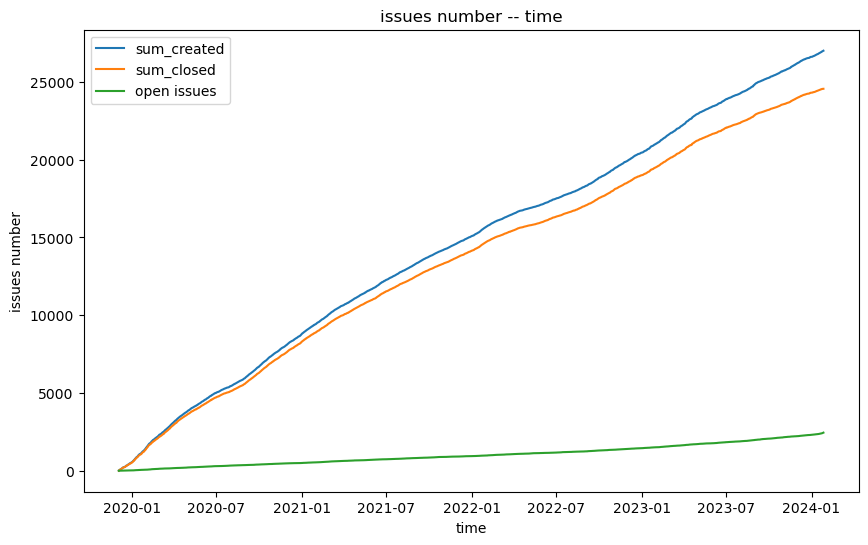

In [6]:
# 将提交时间设为索引列，并按日期进行排序
df = df.set_index('created_at').sort_index()

# 创建累计提交数量列和累计结束数量列
df['sum_created'] = range(1, len(df) + 1)
df['sum_closed'] = df['closed_at'].notnull().cumsum()
df['sum_open'] = df['sum_created'] - df['sum_closed']
# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sum_created'], label='sum_created')
plt.plot(df.index, df['sum_closed'], label='sum_closed')
plt.plot(df.index, df['sum_open'], label='open issues')

# 设置图形属性
plt.xlabel('time')
plt.ylabel('issues number')
plt.title('issues number -- time')
plt.legend()

# 展示折线图
plt.show()

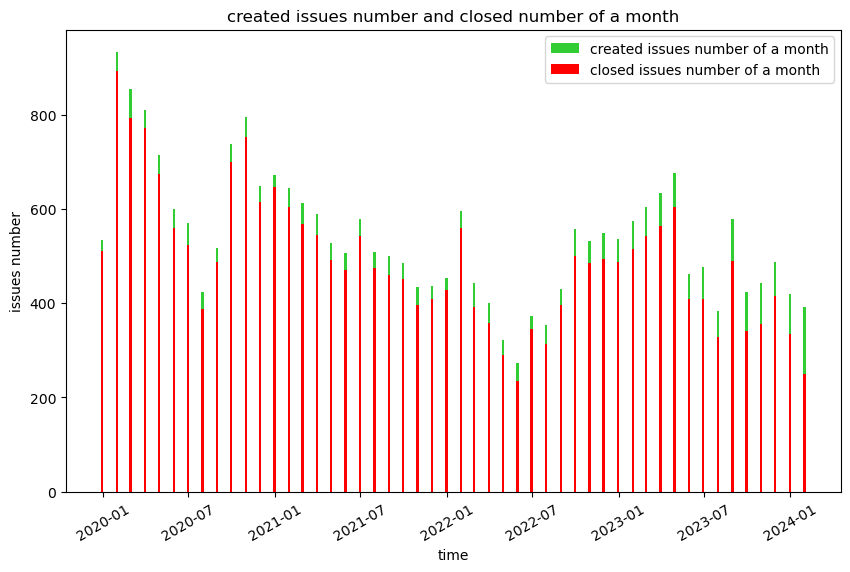

In [7]:
# 计算每月提交和结束的数量
monthly_submissions = df.resample('M').size()
monthly_completed = df[df['closed_at'].notnull()].resample('M').size()

# 绘制柱状图
plt.figure(figsize=(10, 6))
x = monthly_submissions.index
width = 5

plt.bar(x, monthly_submissions, width, color='limegreen', label='created issues number of a month')
plt.bar(x, monthly_completed, width, color='red', label='closed issues number of a month')

# 设置图形属性
plt.xlabel('time')
plt.ylabel('issues number')
plt.title('created issues number and closed number of a month')
plt.legend()

# 旋转x轴标签以避免重叠
plt.xticks(rotation=30)

# 展示柱状图
plt.show()

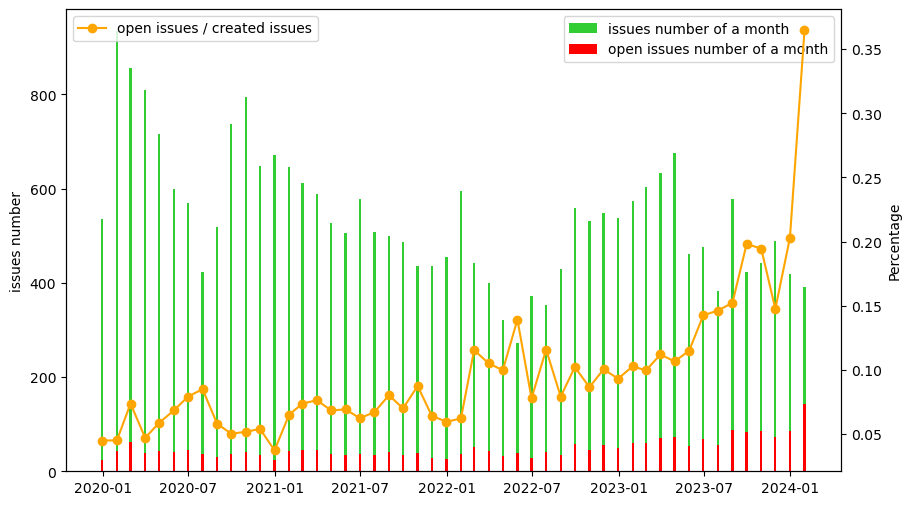

In [27]:
open_issues = df[df['state']=='open'].resample('M').size()

fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制柱状图（数量）
ax1.bar(x, monthly_submissions, width, color='limegreen', label='issues number of a month')
ax1.bar(x, open_issues, width, color='red', label='open issues number of a month')
ax1.set_ylabel('issues number')
ax1.legend()

# 折线图（百分比）
ax2 = ax1.twinx()
ax2.plot(x, open_issues/monthly_submissions, color='orange', marker='o',label = 'open issues / created issues')
ax2.set_ylabel('Percentage')
ax2.legend()

Text(0.5, 1.0, 'issues solve time')

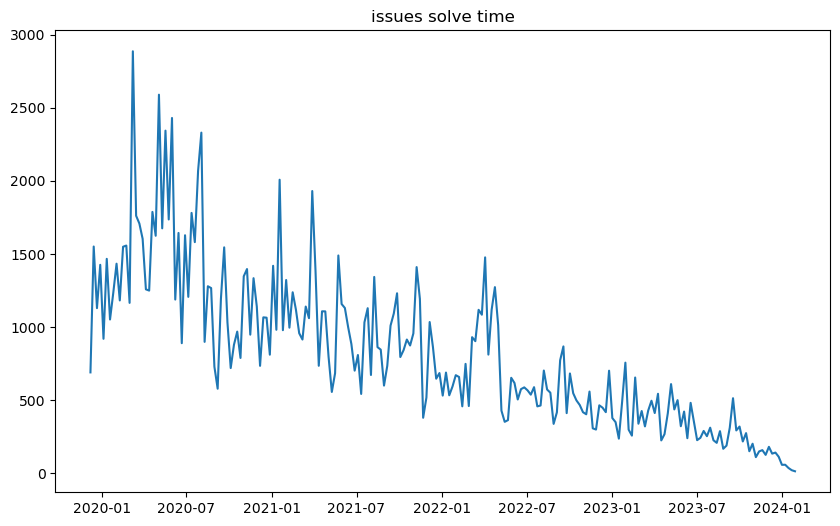

In [24]:
plt.figure(figsize=(10, 6))
df['solve_time'] = (df['closed_at'] - df.index).dt.total_seconds() / 3600
plt.plot(df['solve_time'].resample('W').mean())
plt.title('issues solve time')

In [47]:
df = data_all.copy()
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

In [51]:
labels_str= df['labels'].copy()
labels_str= labels_str.astype(str)
print(labels_str)

0                                                       []
1        ['Bug', 'Needs Discussion', 'inplace', 'Condit...
2                ['Bug', 'Deprecate', 'Warnings', 'Arrow']
3                                                       []
4                                  ['Bug', 'Needs Triage']
                               ...                        
26995                                       ['Code Style']
26996                                 ['Duplicate Report']
26997                              ['Refactor', 'IO HDF5']
26998                       ['Bug', 'Groupby', 'Resample']
26999                               ['Docs', 'MultiIndex']
Name: labels, Length: 27000, dtype: object


In [50]:
filtered_labels = labels_str.dropna()

labels_counts = pd.Series(filtered_labels).value_counts()
print(labels_counts)

labels
['Docs']                                                                           1852
[]                                                                                 1695
['Testing']                                                                         663
['Typing']                                                                          621
['Bug', 'Needs Triage']                                                             613
                                                                                   ... 
['Bug', 'ExtensionArray', 'Accessors']                                                1
['Groupby', 'Algos', 'Transformations']                                               1
['Bug', 'Reshaping', 'Duplicate Report', 'MultiIndex', 'Categorical', 'setops']       1
['Bug', 'Indexing', 'replace']                                                        1
['Output-Formatting', 'Duplicate Report']                                             1
Name: count, Length: 5648

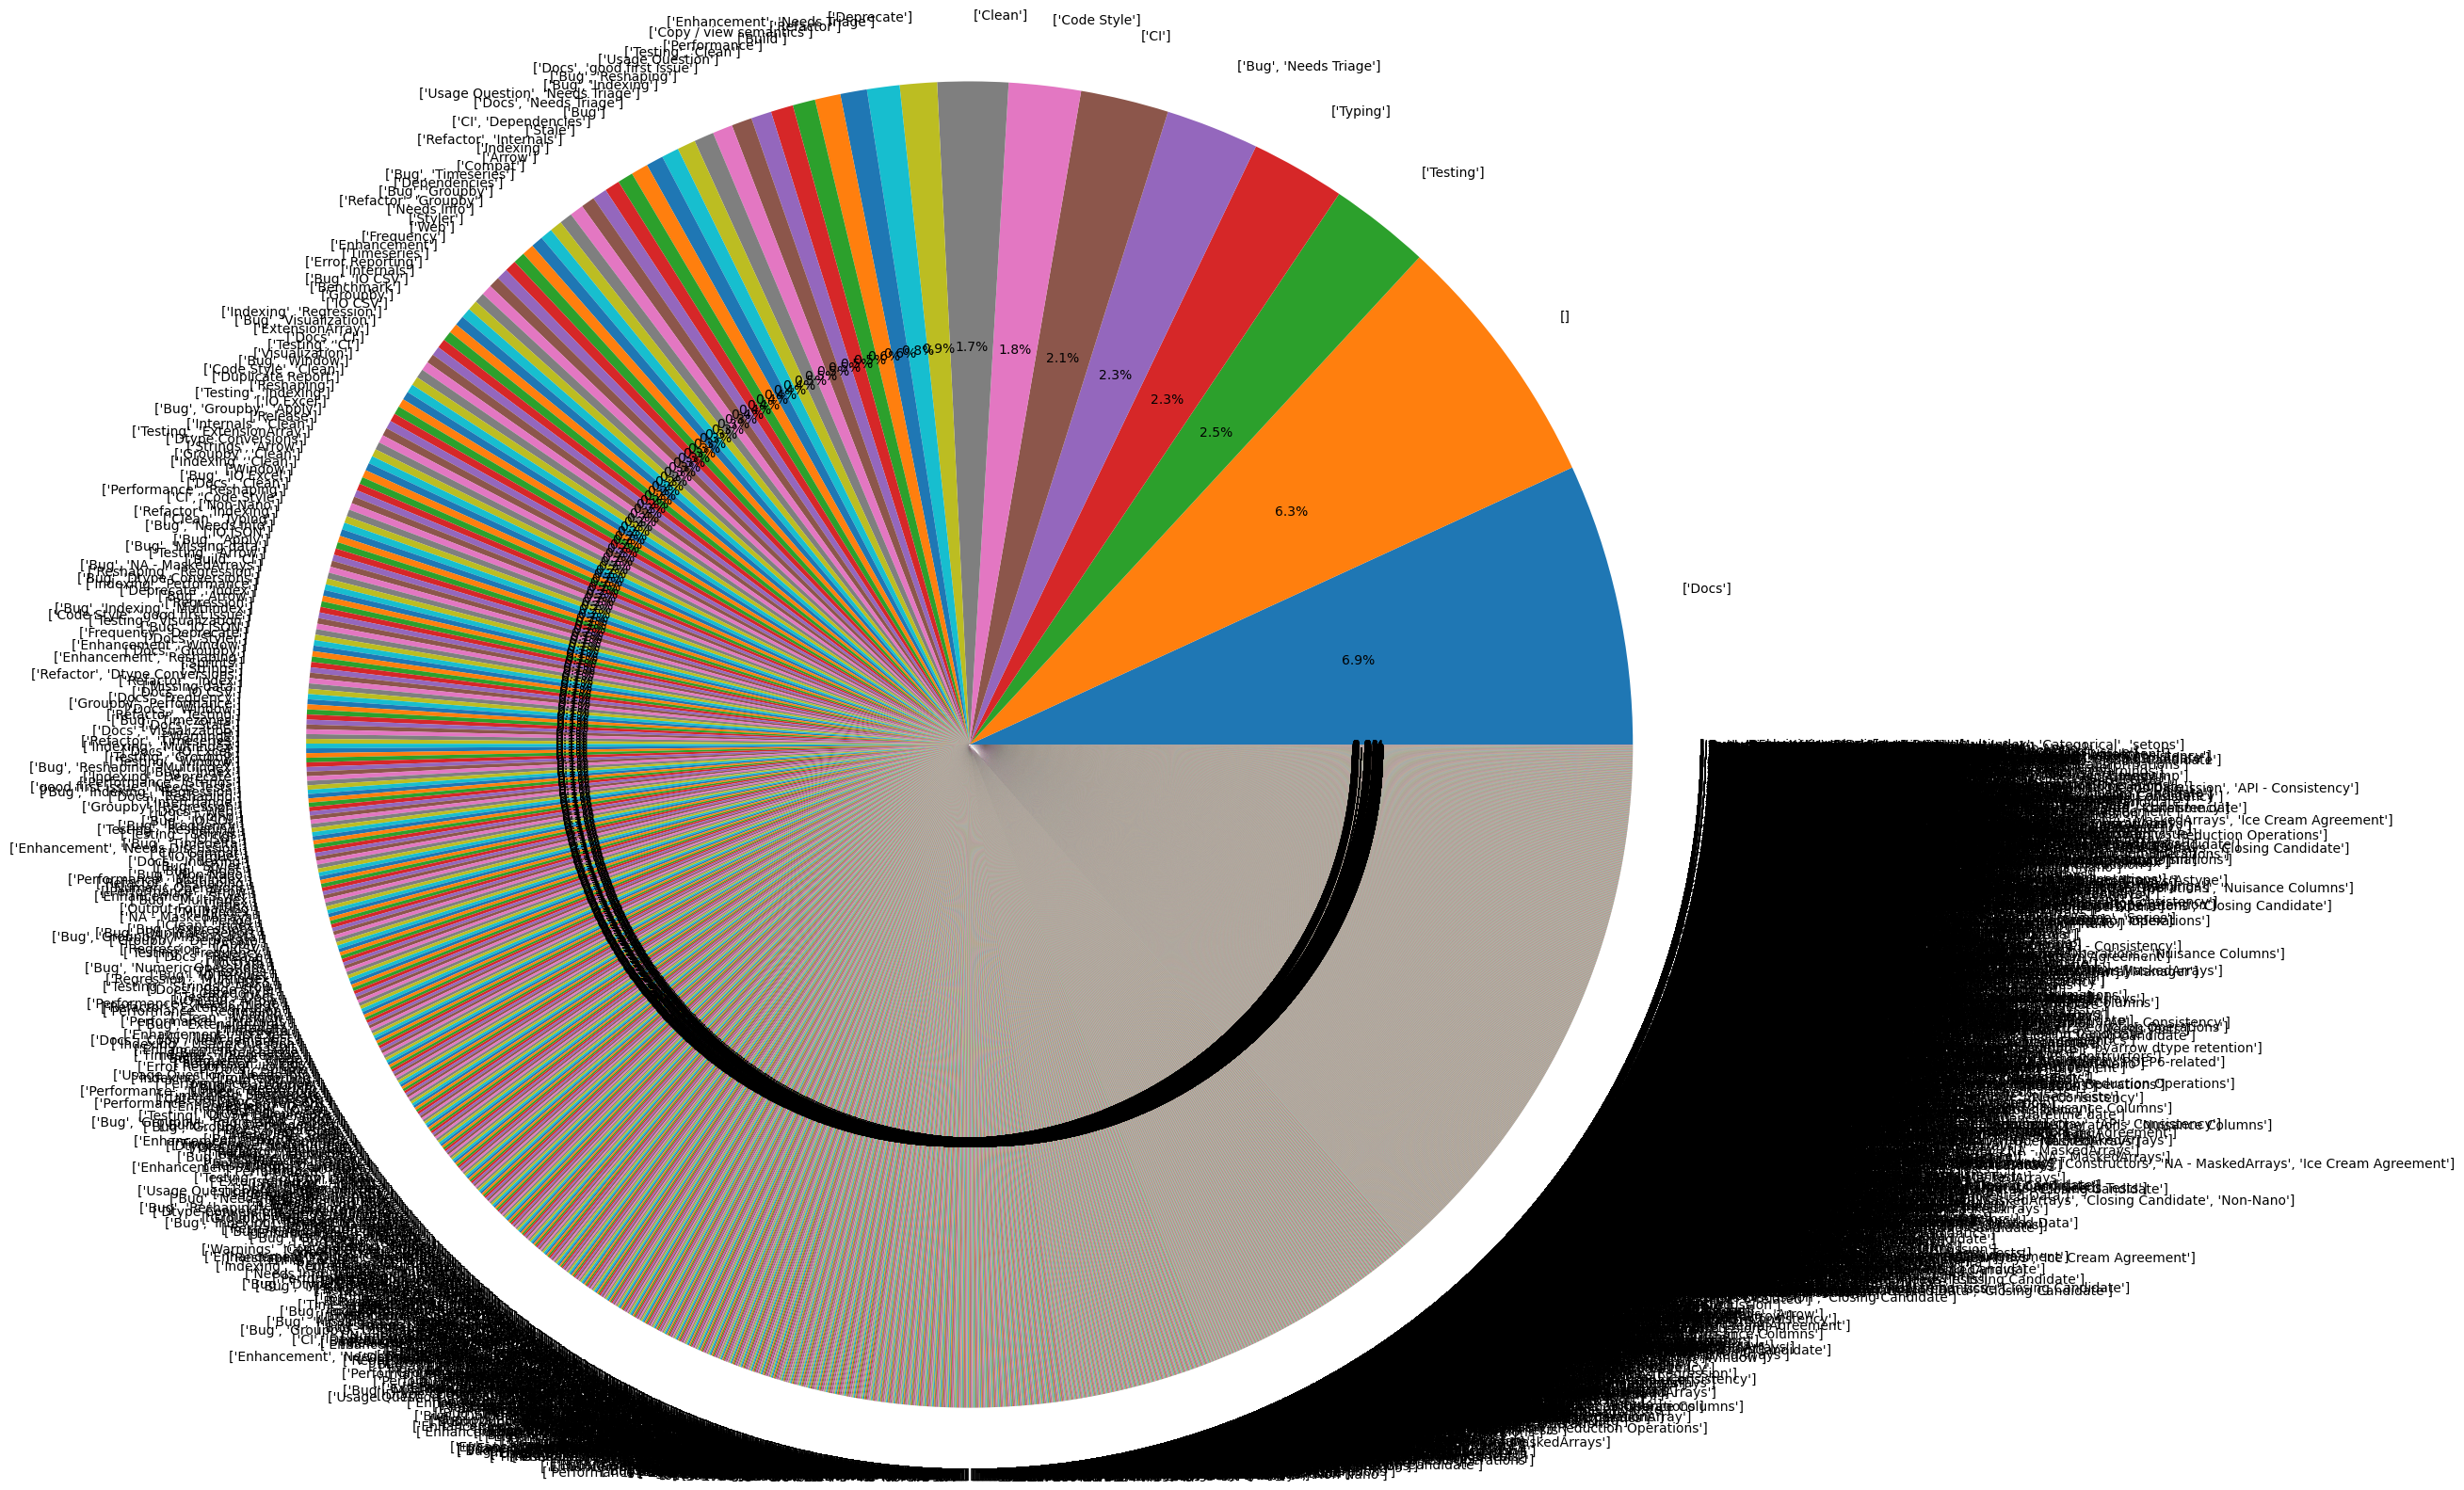

In [53]:
plt.figure(figsize=(20, 20))
labels_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # 使饼图呈现为圆形
plt.show()

In [54]:
time_difference_array = np.array(df['updated_at']-df['created_at'])
time_difference_days = time_difference_array.astype('timedelta64[D]')
print(time_difference_days)

[  0   0   0 ...   0 902   7]


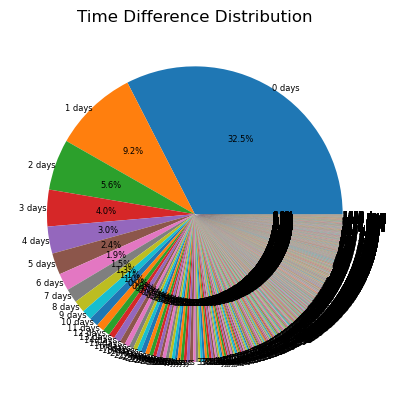

In [55]:
# 计算每个唯一值的频率
unique_values, counts = np.unique(time_difference_days, return_counts=True)

# 绘制饼状图
plt.pie(counts, labels=unique_values, autopct='%1.1f%%',labeldistance=1,
        textprops={'fontsize': 6})
plt.title('Time Difference Distribution')
plt.show()